# Loan Prediction Project

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let's check the features present in our data and then we will look at their data types.

In [4]:
df=df.drop('Loan_ID',axis=1)

In [5]:
df.shape

(614, 12)

We have 11 independent variables and 1 target variable. We will predict the AveragePrice with the help of model built using the train data. Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

1) int64: It represents the integer variables. Integer variables in our dataset are: ApplicantIncome

2) object: It represents the categorical variables. Categorical variables in our dataset are: Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status 

3) float64:It represents the float variable. Float variables in our dataset is: CoappointmentIncome, LoanAmount, Loan_Amount_Term, Credict_History

In [7]:
# We will look for any missing values in the dataset.
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
columns=['LoanAmount','Credit_History','Loan_Amount_Term']
df[columns]=df[columns].replace(np.nan,0)

In [9]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#columns=['Self_Employed','Dependents','Gender']
df=df.dropna()

In [11]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
0.0       12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    431
0.0    123
Name: Credit_History, dtype: int64

In [14]:
df['Dependents'].value_counts()

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64

In [15]:
df['Self_Employed'].value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

# Univariate Analysis

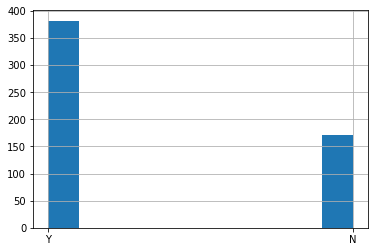

In [16]:
df['Loan_Status'].hist()

From above we can observe that Loan Status of yes is more than no. Yes status is 370 and No is 170

# Bivariate Analysis

<BarContainer object of 554 artists>

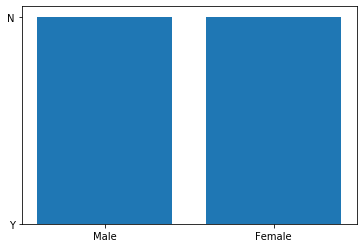

In [17]:
plt.bar(df['Gender'],df['Loan_Status'])

We can observe the relation between Gender and Loan Status from above plot

<BarContainer object of 554 artists>

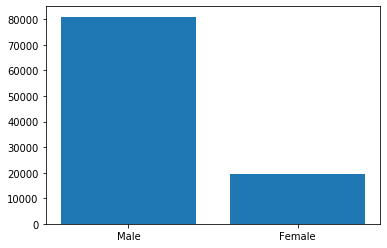

In [18]:
plt.bar(df['Gender'],df['ApplicantIncome'])

We can observe the relation between Gender and ApplicantIncome from above plot

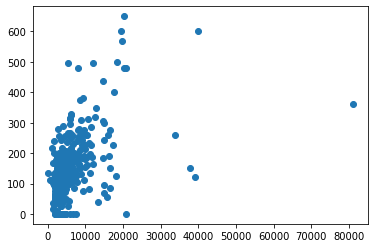

In [19]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])

We can observe the relation between LoanAmount and ApplicantIncome from above plot

<BarContainer object of 554 artists>

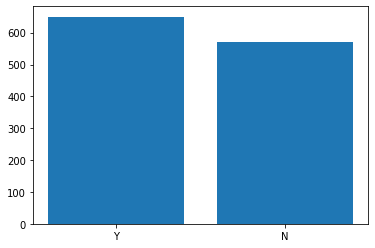

In [20]:
plt.bar(df['Loan_Status'],df['LoanAmount'])

We can observe the relation between Loan Status and LoanAmount from above plot

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [24]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,0.817690,0.653430,0.759928,0.222022,0.137184,5267.059567,1585.575668,139.947653,334.548736,0.777978,1.030686,0.689531
std,0.386449,0.476308,1.010855,0.415981,0.344353,5455.163295,2524.484889,85.266919,81.683210,0.415981,0.786962,0.463104
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2843.750000,0.000000,97.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3839.500000,1149.000000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5818.750000,2297.250000,166.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,650.000000,480.000000,1.000000,2.000000,1.000000


# Multivariate Analysis

<Figure size 1584x864 with 0 Axes>

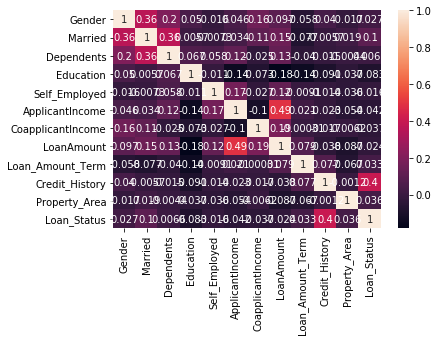

<Figure size 1584x864 with 0 Axes>

In [25]:
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.figure(figsize=[22,12])

In [26]:
# Splitting of individual and target variabe

In [27]:
x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [28]:
x.skew()

Gender              -1.650104
Married             -0.646580
Dependents           0.979788
Education            1.341337
Self_Employed        2.114870
ApplicantIncome      6.881481
CoapplicantIncome    5.736590
LoanAmount           2.225064
Loan_Amount_Term    -2.549742
Credit_History      -1.341337
Property_Area       -0.054158
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
pt=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(pt, columns=x.columns)
x.skew()

Gender              -1.650104
Married             -0.646580
Dependents           0.408055
Education            1.341337
Self_Employed        2.114870
ApplicantIncome     -0.121492
CoapplicantIncome   -0.149353
LoanAmount           0.288299
Loan_Amount_Term    -0.886674
Credit_History      -1.341337
Property_Area       -0.154109
dtype: float64

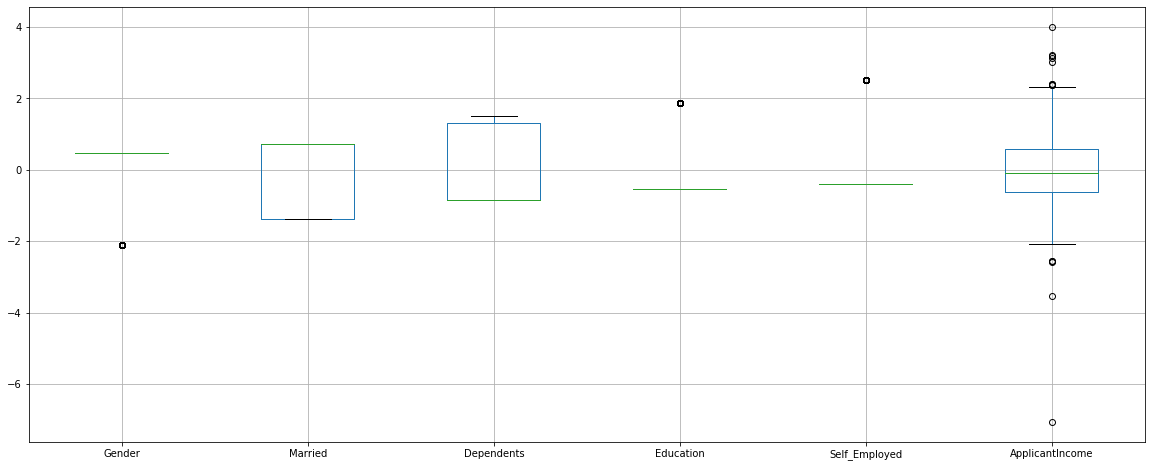

In [30]:
#Checking Outlier
x.iloc[:,0:6].boxplot(figsize=[20,8])

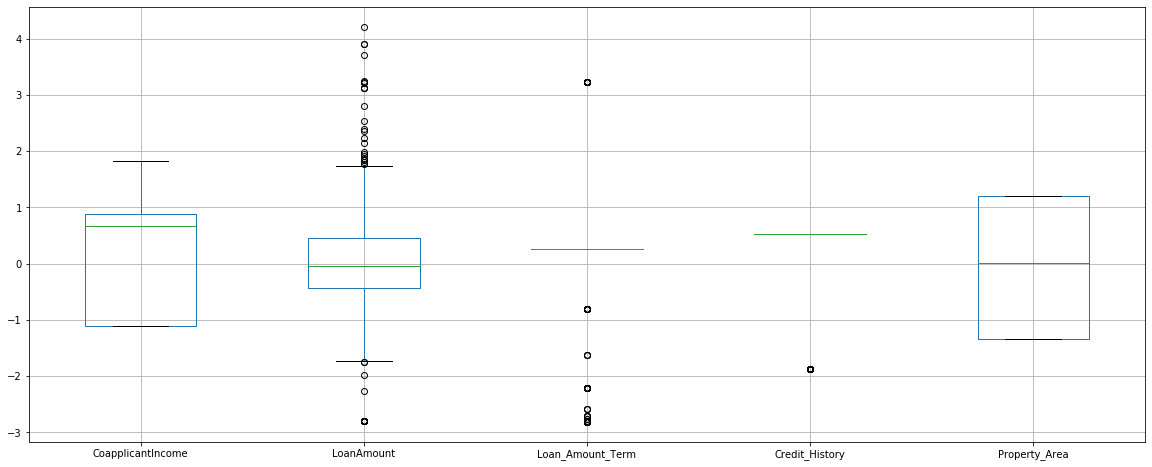

In [31]:
x.iloc[:,6::].boxplot(figsize=[20,8])

In [32]:
from scipy import stats
df['LoanAmount']=stats.zscore(df['LoanAmount'])
df['Loan_Amount_Term']=stats.zscore(df['Loan_Amount_Term'])
df['ApplicantIncome']=stats.zscore(df['ApplicantIncome'])

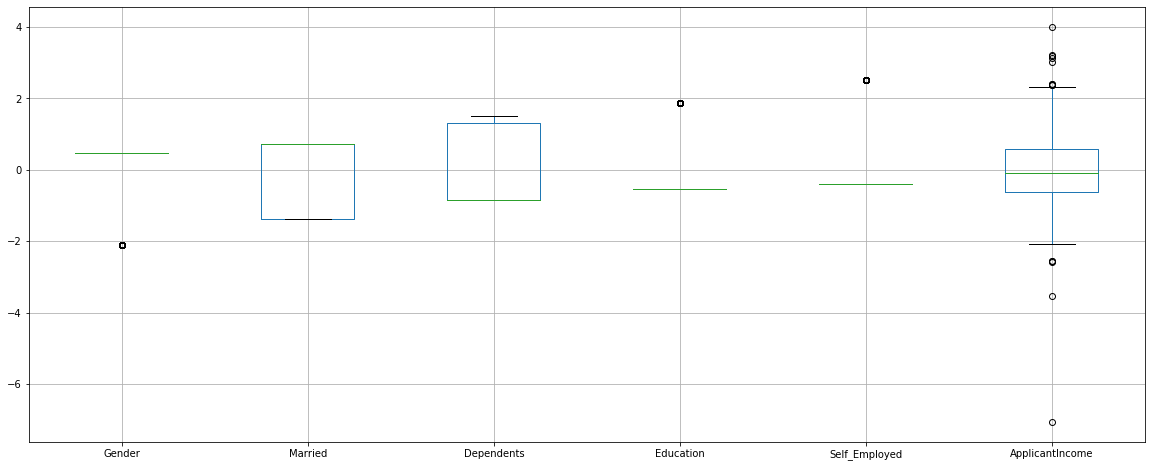

In [33]:
x.iloc[:,0:6].boxplot(figsize=[20,8])

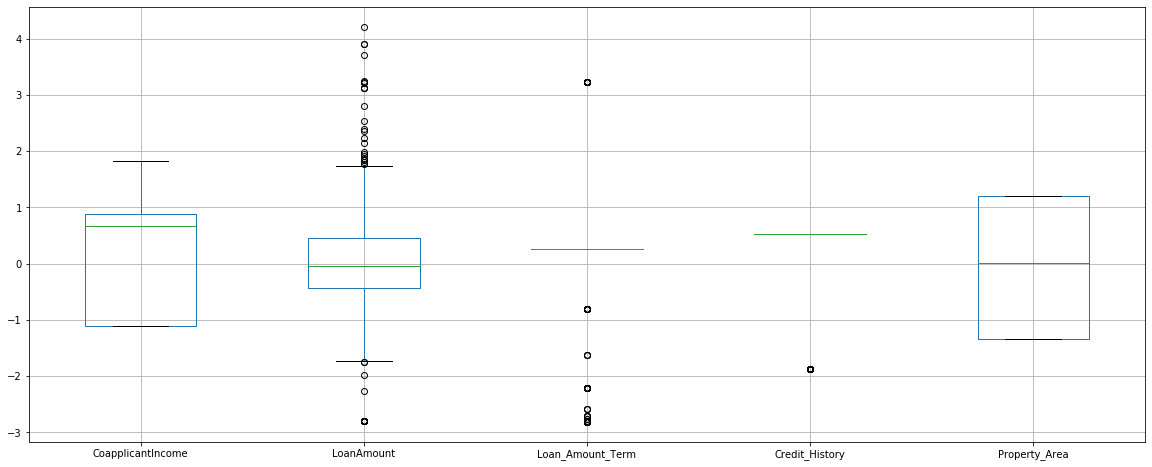

In [34]:
x.iloc[:,6::].boxplot(figsize=[20,8])

# Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=3, test_size=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Best accuracy is', maxAcc,'on Random_state', maxRS)

Best accuracy is 1.0 on Random_state 1


We have found best random state value as 1. We will create our Train_test split using this random state(1).

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1, test_size=0.3)

Now our data is ready. Its time to build our model and check its performance. Logestic regression is used for categorical problems and as it is a categorical problem let's first build a Logestic Regression model.

# LogisticRegression

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predlr))
print('Confusion Matrix :', confusion_matrix(y_test,predlr))
print('Classification Report :', classification_report(y_test,predlr))

Accuracy Score : 0.7724550898203593
Confusion Matrix : [[ 26  27]
 [ 11 103]]
Classification Report :               precision    recall  f1-score   support

           0       0.70      0.49      0.58        53
           1       0.79      0.90      0.84       114

    accuracy                           0.77       167
   macro avg       0.75      0.70      0.71       167
weighted avg       0.76      0.77      0.76       167



# DecisionTreeClassifier

In [39]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,preddtc))
print('Confusion Matrix :', confusion_matrix(y_test,preddtc))
print('Classification Report :', classification_report(y_test,preddtc))

Accuracy Score : 0.6646706586826348
Confusion Matrix : [[24 29]
 [27 87]]
Classification Report :               precision    recall  f1-score   support

           0       0.47      0.45      0.46        53
           1       0.75      0.76      0.76       114

    accuracy                           0.66       167
   macro avg       0.61      0.61      0.61       167
weighted avg       0.66      0.66      0.66       167



# RandomForestClassifier

In [40]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predrfc))
print('Confusion Matrix :', confusion_matrix(y_test,predrfc))
print('Classification Report :', classification_report(y_test,predrfc))

Accuracy Score : 0.7844311377245509
Confusion Matrix : [[ 24  29]
 [  7 107]]
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.45      0.57        53
           1       0.79      0.94      0.86       114

    accuracy                           0.78       167
   macro avg       0.78      0.70      0.71       167
weighted avg       0.78      0.78      0.77       167



# SVC

In [41]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predsvc))
print('Confusion Matrix :', confusion_matrix(y_test,predsvc))
print('Classification Report :', classification_report(y_test,predsvc))

Accuracy Score : 0.7664670658682635
Confusion Matrix : [[ 25  28]
 [ 11 103]]
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.47      0.56        53
           1       0.79      0.90      0.84       114

    accuracy                           0.77       167
   macro avg       0.74      0.69      0.70       167
weighted avg       0.76      0.77      0.75       167



We are getting highest accuracy with RandomForestClassifier(78%) but it can be due to overfitting also so we will check cross validation scores.

In [42]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation score is :', scr1.mean())

Cross Validation score is : 0.7563636363636363


In [43]:
scr2=cross_val_score(dtc,x,y,cv=5)
print('Cross Validation score is :', scr2.mean())

Cross Validation score is : 0.657035217035217


In [44]:
scr3=cross_val_score(rfc,x,y,cv=5)
print('Cross Validation score is :', scr3.mean())

Cross Validation score is : 0.722014742014742


In [45]:
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross Validation score is :', scr4.mean())

Cross Validation score is : 0.7527272727272727


#Minimum difference in accuracy abd cross validation scores is for SVC so this is our best model.

# Hyper parameter tunning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
#Creating parameter list to pass in GridSearchCV
parameter={'max_depth':np.arange(2,15), 'criterion':['gini','entropy']}

In [62]:
gcv=GridSearchCV(rfc,parameter,cv=5)

In [63]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [64]:
gcv.best_params_  # Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 7}

In [65]:
predgcv=gcv.best_estimator_.predict(x_test)

In [66]:
accuracy_score(y_test,predgcv)

0.7784431137724551

In [67]:
import joblib

In [68]:
joblib.dump(gcv.best_estimator_,'Loan_Prediction.pk1')

['Loan_Prediction.pk1']

# Conclusion

In this dataset we can conclude that as per our observation RandomForestRegressor is the best model to predict the target variable of our test dataset. This model gives the best prediction solutions as per other model used above.